# Running Genesis with lume-genesis

#### In this session, we will use the lume-genesis Python package to do the following:
- load input files
- change input files
- run a genesis simulation
- load output results
- plot output results

### Some comments and parameter descriptions were taken from the [Genesis manual](https://github.com/svenreiche/Genesis-1.3-Version4/blob/master/manual). Please browse the manual as you go through the exercises.


### ***Special thanks to Irene Wang and Aditya Thapa for the LCLS-II input files!***
----------

In [1]:
# from lume-genesis
from genesis.version4 import Genesis4
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

----

# 1. Make a run directory

In [3]:
# Lets define our input files
lattice    = 'examples/lcls-II.lat'
input_file = 'examples/lcls-II.in'

# 2. Initialize lume-genesis

In [4]:
# Initialize the run, make genesis object with the LCLSII template input file.
gen = Genesis4(input_file)

The ```Genesis4()``` call above loaded a premade genesis input and lattice file.   
After running this command, we can now look at what is in the input file and make changes in Python.   
All values in ```gen.input``` are parameters in the input file. 
Take a look at the information from the input file in the following cells:

# 3. Look at loaded input with Python

In [5]:
# All inputs in Python are fields from the genesis input file.
# If there is no value in the input file template, default values are filled in.
gen.input

Genesis4Input(
  main=MainInput(
    namelists=[
      Setup(
        rootname='lcls-II',
        lattice='lcls-II.lat',
        beamline='FEL',
        gamma0=6862.0,
        lambda0=3e-09,
        delz=0.039,
        nbins=8,
        shotnoise=False,
      ),
      LatticeNamelist(zmatch=9.0),
      Field(power=4000.0, waist_size=3e-05, dgrid=0.0002, ngrid=255),
      Beam(delgam=1.0, ex=1.2e-06, ey=1.24e-06),
      Write(beam='beginning'),
      Track(),
      Write(beam='end'),
    ],
    filename=pathlib.Path('/Users/aaditya/Documents/GitHub/slacpas/examples/lcls-II.in'),
  ),
  lattice=Lattice(
    elements={
      'D1': Drift(L=0.5),
      'D2': Drift(L=0.45),
      'QF': Quadrupole(L=0.1, k1=3.1),
      'QD': Quadrupole(L=0.1, k1=-3.1),
      'UND': Undulator(aw=2.5, lambdau=0.039, nwig=87),
      'FODO': Line(elements=['D1', 'UND', 'D2', 'QF', 'D2', 'UND', 'D2', 'QD', 'D2']),
      'FEL': Line(elements=[DuplicatedLineItem(label='FODO', count=10)]),
    },
    filename=pathlib.Path('/Users/aaditya/Documents/GitHub/slacpas/examples/lcls-II.lat'),
  ),
  source_path=pathlib.Path('/Users/aaditya/Documents/GitHub/slacpas/examples'),
)

In [6]:
gen.initial_particles # empty because no beam is loaded.
# You can supply genesis an initial beam distribution.

In [7]:
dir(gen.input) # list of possible inputs you can change.

['archive',
 'arguments',
 'beamline',
 'from_archive',
 'from_main_input',
 'from_strings',
 'initial_field',
 'initial_particles',
 'input_filename',
 'lattice',
 'lattice_filename',
 'lattice_name',
 'main',
 'output_path',
 'seed',
 'source_path',
 'to_genesis',
 'to_string',
 'to_table',
 'write',
 'write_context',
 'write_initial_field',
 'write_initial_particles',
 'write_run_script']

In [8]:
gen.output # Output is empty because we have not run a simulation yet.

Next, look at the lattice info.   
There are two items in the lattice information: 
- elements = beam line components.
- filename = file with lattice definition. 

In [9]:
# list of elements and parameters
# L = length of elements
gen.input.lattice

Lattice(
  elements={
    'D1': Drift(L=0.5),
    'D2': Drift(L=0.45),
    'QF': Quadrupole(L=0.1, k1=3.1),
    'QD': Quadrupole(L=0.1, k1=-3.1),
    'UND': Undulator(aw=2.5, lambdau=0.039, nwig=87),
    'FODO': Line(elements=['D1', 'UND', 'D2', 'QF', 'D2', 'UND', 'D2', 'QD', 'D2']),
    'FEL': Line(elements=[DuplicatedLineItem(label='FODO', count=10)]),
  },
  filename=pathlib.Path('/Users/aaditya/Documents/GitHub/slacpas/examples/lcls-II.lat'),
)

Genesis lattice files consist of components in the beamline (from [manual](https://github.com/svenreiche/Genesis-1.3-Version4/blob/master/manual/LATTICE.md)):

- UND - Main magnetic field (undulator)
- Dx  - Drift section
- QF  - Focusing quadrupole 
- QD  - Defocusing quadrupole 

Information included in the element descriptions: 
- L    = length of the structure in measure of the unit length.
- aw   = the dimensionless rms undulator parameter.
- nwig = number of periods. 
- lambdau = unulator period length in m.

See the manual page above for more details.

# 4. Run LCLS-II Genesis file

Genesis can output many types of data. There are several flags for data output that can be changed in the input file or Python. In these examples, we are only running steady state (time independant) simulations and using default outputs. For more details on steady state simulation, check out this example in the manual: https://github.com/svenreiche/Genesis-1.3-Version4/tree/master/examples/Example1-SteadyState.

In [10]:
gen.verbose = True

In [11]:
output = gen.run()

Configured to run in: /var/folders/qx/dyrxp4cj03l5328wsbdkpz20znqv3p/T/tmppcr6i6p0
Running Genesis4 in /var/folders/qx/dyrxp4cj03l5328wsbdkpz20znqv3p/T/tmppcr6i6p0
/Users/aaditya/opt/anaconda3/envs/fel2024/bin/genesis4 -l lcls-II.lat genesis4.in
---------------------------------------------
GENESIS - Version 4.6.6 has started...
Compile info: Compiled by runner at 2024-06-10 16:26:41 [UTC] from Git Commit ID: 
Starting Time: Tue Aug 13 16:05:07 2024

MPI-Comm Size: 1 node

Opened input file genesis4.in
Parsing lattice file lcls-II.lat ...
Matching for periodic solution between z = 0 and z = 9 :
   betax (m) : 2.94989
   alphax    : -0.4868
   phix (deg): 87.595
   betay (m) : 13.9016
   alphay    : 2.17265
   phiy (deg): 92.2785
Generating input radiation field for HARM = 1 ...


[PC100405:87826] shmem: mmap: an error occurred while determining whether or not /var/folders/qx/dyrxp4cj03l5328wsbdkpz20znqv3p/T//ompi.PC100405.1062988918/jf.0/3830054912/sm_segment.PC100405.1062988918.e44a0000.0 could be created.


Generating input particle distribution...
Writing particle distribution to file: beginning.par.h5 ...

Running Core Simulation...
Steady-state run
Initial analysis of electron beam and radiation field...
  Calculation: 0% done
  Calculation: 10% done
  Calculation: 20% done
  Calculation: 30% done
  Calculation: 40% done
  Calculation: 50% done
  Calculation: 60% done
  Calculation: 70% done
  Calculation: 80% done
  Calculation: 90% done
Writing output file...

Core Simulation done.
End of Track
Writing particle distribution to file: end.par.h5 ...

Program is terminating...
Ending Time: Tue Aug 13 16:05:17 2024
Total Wall Clock Time: 10.6637 seconds
-------------------------------------
Success - execution took 11.00s.


In [12]:
# Configure the runs with changes made above
#dir(gen.configure)

# 5. Output

There are many types of output that can be saved. We leave the defaults in this case.

In [13]:
gen.output # gives info about run time and outputs.

Genesis4Output(
  run=RunInfo(
    error_reason='',
    run_script='/Users/aaditya/opt/anaconda3/envs/fel2024/bin/genesis4 -l lcls-II.lat genesis4.in',
    run_time=10.997926749987528,
  ),
  beam=OutputBeam(
    extra={},
    globals=OutputBeamGlobal(
      extra={},
      energy=array([], dtype=float64),
      energyspread=array([], dtype=float64),
      xposition=array([], dtype=float64),
      yposition=array([], dtype=float64),
      xsize=array([], dtype=float64),
      ysize=array([], dtype=float64),
    ),
    bunching=array(shape=(1811, 1), dtype=float64),
    bunchingphase=array(shape=(1811, 1), dtype=float64),
    energy=array(shape=(1811, 1), dtype=float64),
    energyspread=array(shape=(1811, 1), dtype=float64),
    xsize=array(shape=(1811, 1), dtype=float64),
    ysize=array(shape=(1811, 1), dtype=float64),
    lsc_field=array(shape=(1811, 1), dtype=float64),
    ssc_field=array(shape=(1811, 1), dtype=float64),
    efield=array(shape=(1811, 1), dtype=float64),
    wakefield=array(shape=(1811, 1), dtype=float64),
    emin=array(shape=(1811, 1), dtype=float64),
    emax=array(shape=(1811, 1), dtype=float64),
    pxmin=array(shape=(1811, 1), dtype=float64),
    pxmax=array(shape=(1811, 1), dtype=float64),
    pymin=array(shape=(1811, 1), dtype=float64),
    pymax=array(shape=(1811, 1), dtype=float64),
    pxposition=array(shape=(1811, 1), dtype=float64),
    pyposition=array(shape=(1811, 1), dtype=float64),
    xmin=array(shape=(1811, 1), dtype=float64),
    xmax=array(shape=(1811, 1), dtype=float64),
    ymin=array(shape=(1811, 1), dtype=float64),
    ymax=array(shape=(1811, 1), dtype=float64),
    xposition=array(shape=(1811, 1), dtype=float64),
    yposition=array(shape=(1811, 1), dtype=float64),
    alphax=array([[-0.48680106]]),
    alphay=array([[2.17265866]]),
    betax=array([[2.94988048]]),
    betay=array([[13.901693]]),
    current=array(shape=(1811, 1), dtype=float64),
    emitx=array([[1.20000385e-06]]),
    emity=array([[1.23999252e-06]]),
  ),
  field_harmonics={
    '1': OutputField(
      extra={},
      globals=OutputFieldGlobal(
        extra={},
        energy=array([], dtype=float64),
        intensity_farfield=array([], dtype=float64),
        intensity_nearfield=array([], dtype=float64),
        xdivergence=array([], dtype=float64),
        ydivergence=array([], dtype=float64),
        xpointing=array([], dtype=float64),
        ypointing=array([], dtype=float64),
        xposition=array([], dtype=float64),
        yposition=array([], dtype=float64),
        xsize=array([], dtype=float64),
        ysize=array([], dtype=float64),
      ),
      dgrid=1.5748031496062992e-06,
      intensity_farfield=array(shape=(1811, 1), dtype=float64),
      intensity_nearfield=array(shape=(1811, 1), dtype=float64),
      ngrid=255,
      phase_farfield=array(shape=(1811, 1), dtype=float64),
      phase_nearfield=array(shape=(1811, 1), dtype=float64),
      power=array(shape=(1811, 1), dtype=float64),
      xdivergence=array(shape=(1811, 1), dtype=float64),
      ydivergence=array(shape=(1811, 1), dtype=float64),
      xpointing=array(shape=(1811, 1), dtype=float64),
      ypointing=array(shape=(1811, 1), dtype=float64),
      xposition=array(shape=(1811, 1), dtype=float64),
      yposition=array(shape=(1811, 1), dtype=float64),
      xsize=array(shape=(1811, 1), dtype=float64),
      ysize=array(shape=(1811, 1), dtype=float64),
      energy=array(shape=(1811,), dtype=float64),
    ),
  },
  lattice=OutputLattice(
    extra={},
    aw=array(shape=(1810,), dtype=float64),
    ax=array(shape=(1810,), dtype=float64),
    ay=array(shape=(1810,), dtype=float64),
    chic_angle=array(shape=(1810,), dtype=float64),
    chic_lb=array(shape=(1810,), dtype=float64),
    chic_ld=array(shape=(1810,), dtype=float64),
    chic_lt=array(shape=(1810,), dtype=float64),
    cx=array(shape=(1810,), dtype=float64),
    cy=array(shape=(1810,), dtype=float64),
    dz=array(shape=(1810,), dtype=float64),
    gradx=array(shape=(1810,

The run above is by default single core.   
You can run also run using mpi on multiple cores, we leave that to interested parties. 

# 6. Archiving the data

Saving the data to an h5 file allows you to reload with lume-genesis, and save most data in one file.   
You can reload your data after closing jupyterlab, and don't need to leave the browser window open.

Some notes on output files:  
fld - field history file (can get large)  
par - can get very large if many slices  
dlf (wavefront), dpa (phase space) are final field and particle files

More examples can be found here: https://github.com/slaclab/lume-genesis/tree/master/docs/examples/genesis4.

In [14]:
# Archive data to h5 so that you can reload it later.
gen.archive('examples/lcls-II_sase.h5')

# 7. Loading data from archive file 

In [15]:
# Output data can be loaded in a new or saved in gen object
#gen.load_archive('examples/LCLSII_sase.h5')

----

# 8. Plotting results

LUME-Genesis offers a plotting helpers on the Genesis4 object (and `Genesis4Output` itself) to work with the output data. You can specify individual data keys to plot the output data and the layout below.

### Lattice plot

View the lattice data (as interpreted by Genesis4) by interacting with the `output.lattice` object:

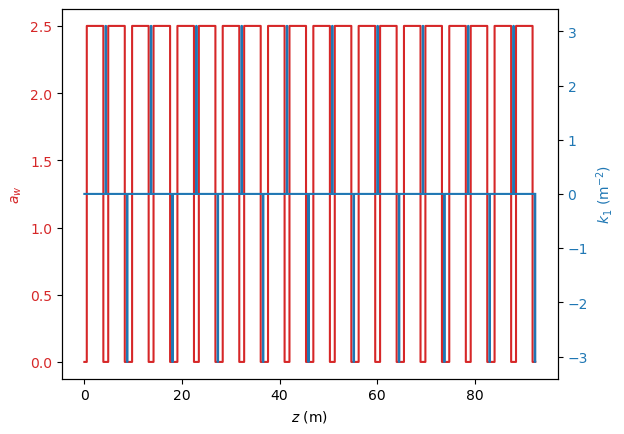

In [16]:
output.lattice.plot();

<!-- lume-genesis detected Jupyter and will use HTML for rendering. -->

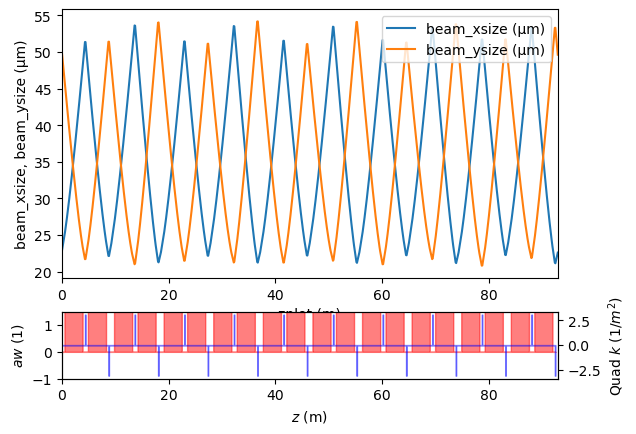

In [17]:
#Plotting beam size vs. undulator
gen.plot(["beam_xsize", "beam_ysize"])

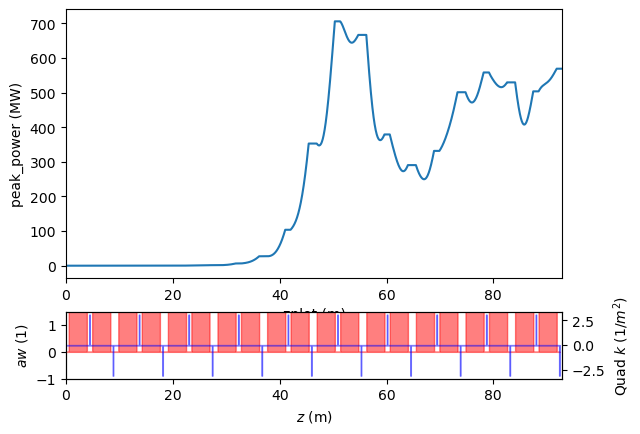

In [18]:
# Plot SASE power
power = gen.plot(["field_power"])

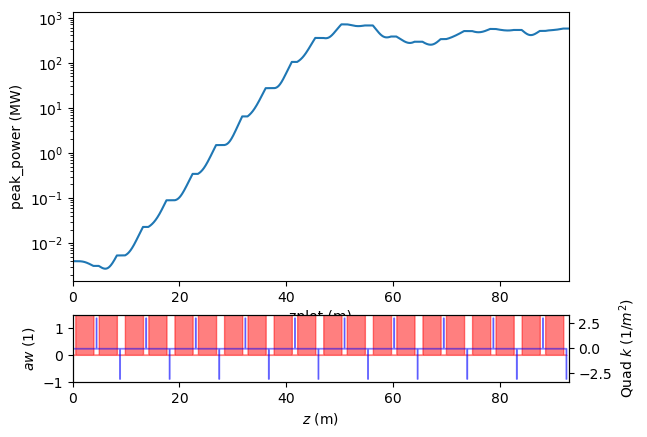

In [19]:
# Plot log of power.
power = gen.plot(["field_power"], yscale='log')

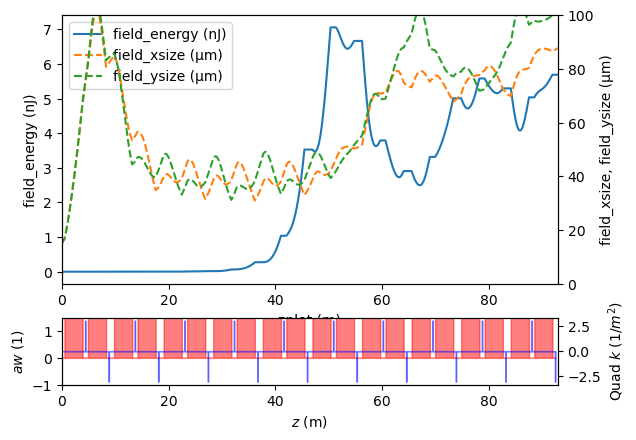

In [20]:
gen.plot("field_energy", y2=["field_xsize", "field_ysize"], ylim2=[0, 100e-6])

In [21]:
len(output.load_particles())

2

In [22]:
output.load_particles()

['beginning', 'end']

In [23]:
output.load_particles()
pbeg = output.particles['beginning']
pend = output.particles['end'] 

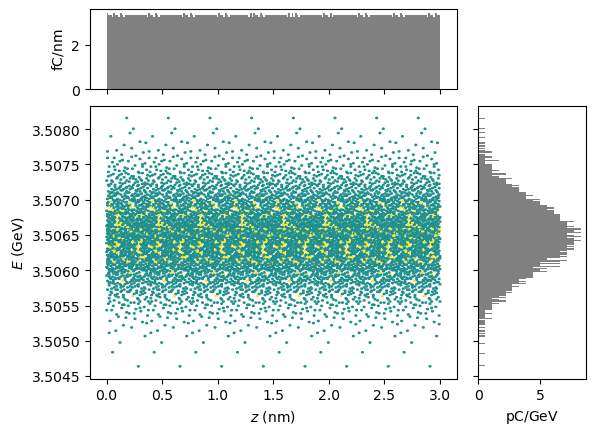

In [24]:
pbeg.plot("z", "energy", bins=200)

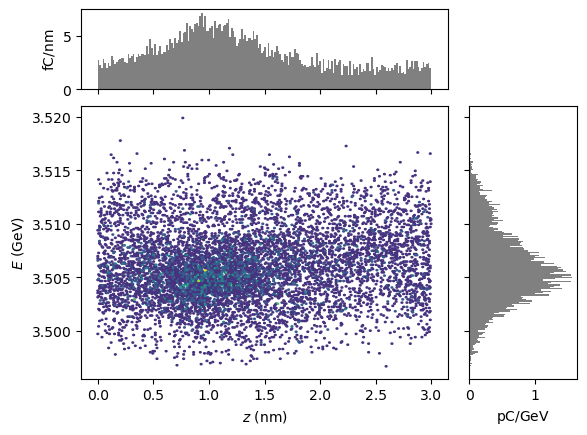

In [25]:
pend.plot("z", "energy", bins=200)

In [26]:
# Beam movie here
# change number of beam steps saved
# re-run simulation
# plot in movie

In [76]:
steps = output.particles.keys

<function dict.keys>

In [74]:
for n in steps.keys[2:]:
    #print(n)
    hold = output.particles[n]
    #data, xedge, yedge, mesh = plt.hist2d(hold.z, hold.energy, bins=200)
    #hold.plot("z", "energy", bins=200)
    #plt.show()
    #print(len(all_data))
    #hold.plot('z', 'energy', bins=200)
    #plt.savefig('hold'+str(n)+'.pdf')

TypeError: 'builtin_function_or_method' object is not subscriptable

KeyError: 0

Error in callback <function _draw_all_if_interactive at 0x16c9d2700> (for post_execute), with arguments args (),kwargs {}:


KeyError: 0

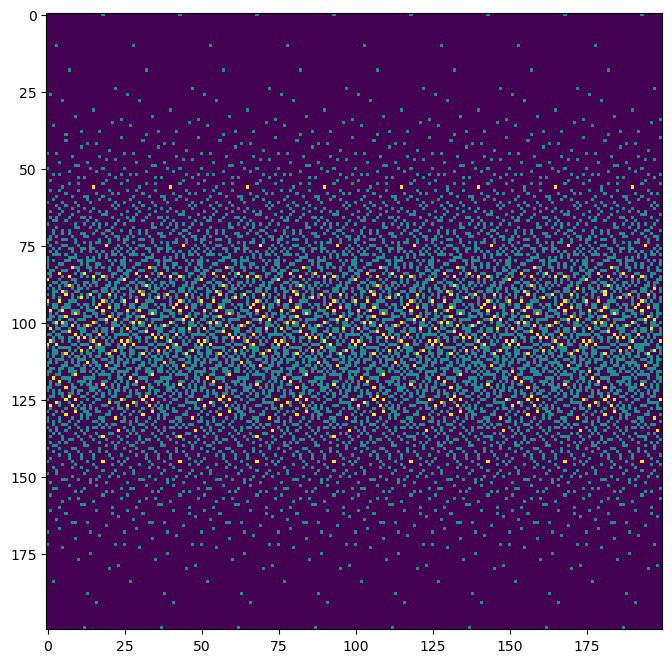

In [66]:
fig, ax = plt.subplots(figsize = (8,8))

#Create 2d Histogram
data,x,y = np.histogram2d(pbeg.z,pbeg.energy, bins = 200)

#Smooth with filter
im = plt.imshow(data.T)#, interpolation = 'gaussian', origin = 'lower')

#Define animation. 
# def animate(i) :
#     X = np.random.randn(100000)
#     Y = np.random.randn(100000) + 5
#     data,x,y = np.histogram2d(X,Y, bins = 15)
#     im.set_data(data)

def animate(i):
    #print(i)
    hold = output.particles[int(i)]
    data, xedge, yedge = np.histogram2d(hold.z, hold.energy, bins=200)
    im.set_data(data.T)


ani = animation.FuncAnimation(fig, animate, np.arange(0,1800,100),
                          interval = 500, blit = False)

ani.save('movie.mp4')

----